In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
id,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.700 6..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


In [2]:
functional_zones_gdf = gpd.read_parquet('./../data/functional_zones.parquet').rename(columns={'zone': 'functional_zone'})
functional_zones_gdf.head()

,functional_zone,geometry
0,Т1Ж2-2,"MULTIPOLYGON (((349202.695 6660862.796, 349199..."
1,Т1Ж2-2,"MULTIPOLYGON (((345558.116 6666406.372, 345528..."
2,Т1Ж2-2,"MULTIPOLYGON (((347805.242 6663237.649, 347790..."
3,Т1Ж2-2,"MULTIPOLYGON (((346292.257 6667294.593, 346266..."
4,Т1Ж2-2,"MULTIPOLYGON (((350166.384 6660332.141, 350186..."


## Land use assignment

In [3]:
from blocksnet.enums import LandUse

rules = {
    "Т3Ж1": LandUse.RESIDENTIAL,
    "ТР0-2": LandUse.RECREATION,
    "Т3Ж2": LandUse.RESIDENTIAL,
    "Т1Ж2-1": LandUse.RESIDENTIAL,
    "Т2ЖД2": LandUse.RESIDENTIAL,
    "ТД1-3": LandUse.BUSINESS,
    "ТД2": LandUse.BUSINESS,
    "ТД3": LandUse.BUSINESS,
    "ТУ": LandUse.TRANSPORT,
    "ТИ4": LandUse.TRANSPORT,
    "ТД1-1": LandUse.RESIDENTIAL,
    "ТД1-2": LandUse.RESIDENTIAL,
    "ТПД1": LandUse.INDUSTRIAL,
    "ТПД2": LandUse.INDUSTRIAL,
    "ТИ1-1": LandUse.TRANSPORT,
    "Т3ЖД3": LandUse.RESIDENTIAL,
    "ТК1": LandUse.SPECIAL,
    "ТР2": LandUse.RECREATION,
    "ТИ2": LandUse.TRANSPORT,
    "ТР5-2": LandUse.RECREATION,
    "Т1Ж2-2": LandUse.RESIDENTIAL,
    "ТР4": LandUse.RECREATION,
    "ТР5-1": LandUse.RECREATION,
    "Т2Ж1": LandUse.RESIDENTIAL,
    "ТИ3": LandUse.TRANSPORT,
    "Т1Ж1": LandUse.RESIDENTIAL,
    "ТИ1-2": LandUse.TRANSPORT,
    "ТР3-2": LandUse.RECREATION,
    "ТР0-1": LandUse.RECREATION,
    "ТП2": LandUse.INDUSTRIAL,
    "ТК3": LandUse.SPECIAL,
    "ТР1": LandUse.RECREATION,
    "ТР3-1": LandUse.RECREATION,
    "ТС1": LandUse.AGRICULTURE,
    "ТК2": LandUse.SPECIAL,
    "ТП1": LandUse.INDUSTRIAL,
    "ТП3": LandUse.INDUSTRIAL,
    "ТП4": LandUse.INDUSTRIAL,
    "ТС2": LandUse.SPECIAL,
}

In [5]:
from blocksnet.blocks.assignment import assign_land_use

land_use_gdf = assign_land_use(blocks_gdf, functional_zones_gdf, rules)

2025-03-26 15:45:56.478 | INFO     | blocksnet.blocks.assignment.core:assign_land_use:43 - Overlaying geometries.
2025-03-26 15:46:05.841 | SUCCESS  | blocksnet.blocks.assignment.core:assign_land_use:54 - Shares calculated.


In [6]:
land_use_gdf

,geometry,residential,business,recreation,industrial,transport,special,agriculture,land_use,share
id,,,,,,,,,,
0,"POLYGON ((354918.622 6625258.829, 354901.464 6...",0.000000,0.0,0.680244,0.0,0.314652,0.000000,0.0,LandUse.RECREATION,0.680244
1,"POLYGON ((355412.142 6623378.149, 355411.700 6...",0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,LandUse.TRANSPORT,1.000000
2,"POLYGON ((353934.329 6625429.433, 353923.453 6...",0.000000,0.0,0.854630,0.0,0.084200,0.000073,0.0,LandUse.RECREATION,0.854630
3,"POLYGON ((355099.099 6623847.765, 355074.808 6...",0.400810,0.0,0.000000,0.0,0.599190,0.000000,0.0,LandUse.TRANSPORT,0.599190
4,"POLYGON ((352766.168 6621954.748, 352744.412 6...",0.002242,0.0,0.850359,0.0,0.009041,0.000000,0.0,LandUse.RECREATION,0.850359
...,...,...,...,...,...,...,...,...,...,...
16315,"POLYGON ((335210.252 6655823.328, 335105.217 6...",0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,LandUse.TRANSPORT,1.000000
16316,"POLYGON ((315582.435 6679561.357, 315523.467 6...",0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,LandUse.TRANSPORT,1.000000
16317,"POLYGON ((316419.909 6679189.653, 316319.749 6...",0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.0,LandUse.TRANSPORT,1.000000


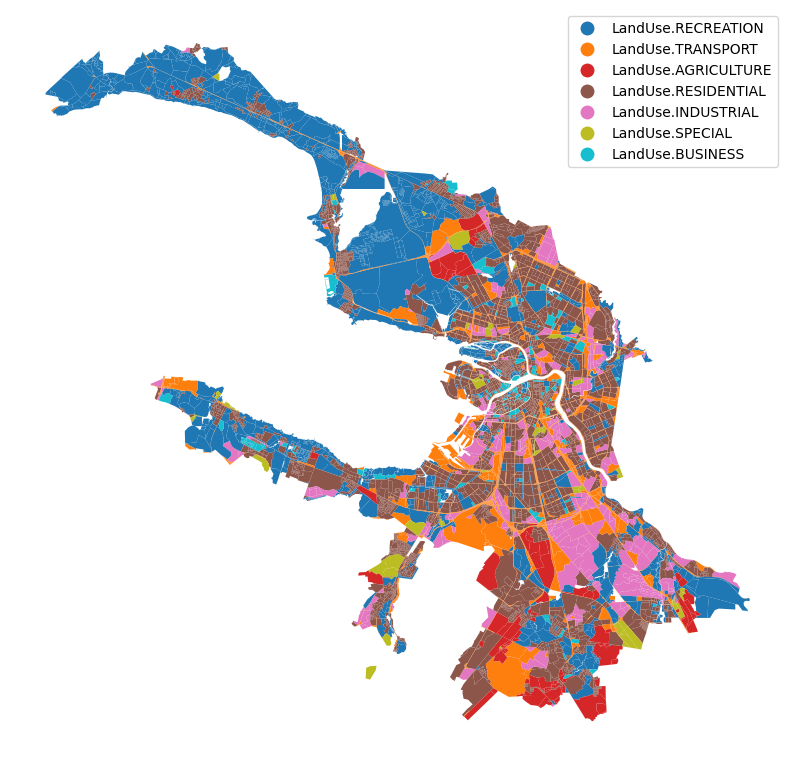

In [7]:
land_use_gdf.plot(column='land_use', legend=True, figsize=(10,10)).set_axis_off()

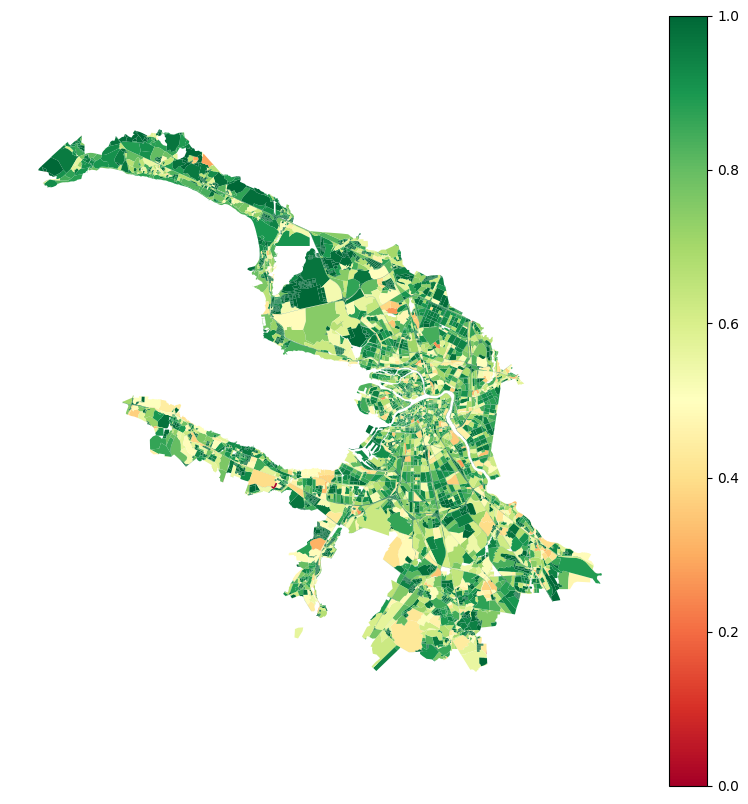

In [8]:
land_use_gdf.plot(column='share', cmap='RdYlGn', legend=True, vmin=0, vmax=1, figsize=(10,10)).set_axis_off()